# Tutorial 02 – Exploration Data Analysis

Exploration data analysis or initial data analysis is a task of assessing and understanding the data. One can describe the data using statistics (e.g., mean, standard deviation, and quantiles), distributions (e.g., normal, exponential, and log-normal), and plots (e.g. histograms, box plots, and scatter plots). All of these techniques are aimed at providing simple and comprehensive image of what actually is in the data, how noisy is the data, and what model assumptions might by violated by this data. We do not have any model right now, so we will focus more on data understanding and quality assessment.

Let's use `Pandas` to load some data and explore it a bit.

In [24]:
import pandas as pd

In [25]:
datasaurus = pd.read_csv(
    "https://www.fi.muni.cz/~xcechak1/IB031/datasets/datasaurus.csv",
    header=0,  # do not use values as column names
    names=["x", "y"],  # set custom column names
)
datasaurus

,x,y
0,51.5385,96.0256
1,46.1538,94.4872
2,42.8205,91.4103
3,40.7692,88.3333
4,38.7179,84.8718
...,...,...
136,39.4872,25.3846
137,91.2821,41.5385
138,50.0000,95.7692
139,47.9487,95.0000


The dataset is fairly small, only 141 observations and 2 features per observation. We can now calculate basic statistics of each feature.

In [26]:
datasaurus.describe()

,x,y
count,141.000000,141.000000
mean,54.255321,47.482272
std,16.824642,26.705447
min,22.307700,2.948700
25%,44.102600,25.256400
50%,53.076900,46.025600
75%,64.871800,66.794900
max,98.205100,99.487200


Both features live roughly between 0 and 100. Feature `x` seems to be shifted slightly towards 100. We can also calculate correlation of the two features.

In [27]:
datasaurus.corr()

,x,y
x,1.000000,-0.066146
y,-0.066146,1.000000


So far, the features seems to be pretty random and not much correlated. But you should never trust the summary statistics alone, you should always plot your data. Here is why...

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


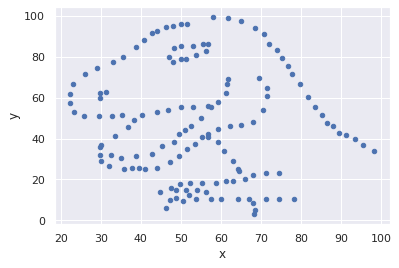

In [28]:
datasaurus.plot(kind="scatter", x="x", y="y")

Images are very natural way of representation for humans and we are well adapted at seeing patterns (even in data in which there are no patterns). However, choosing the right kind of plot (and its parameters) is a bit tricky. Here are a few other plots that do not convey that much data comprehension.

#### Line plot
Each feature is represented by a curve that follows changes in its value. This plot is most useful for time series data or data with some other natural progression. Sorting values might help in some cases, but not in this one.

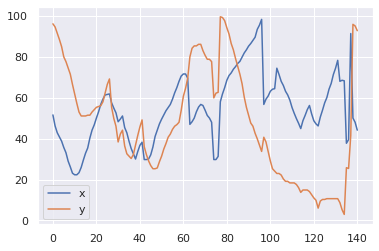

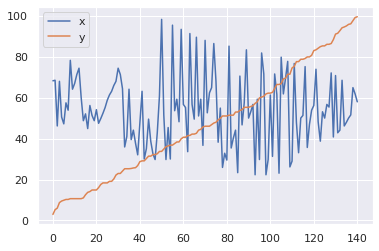

In [29]:
datasaurus.plot(kind="line")
# sort data by value of `y` and reindex the data
datasaurus.sort_values(by=["y"]).reset_index(drop=True).plot(kind="line")

#### Histograms
Histograms are especially useful for getting an idea of the feature distribution. It can take years of experience to recognize distributions from mean, deviation and quantiles, but it takes seconds to do that with histograms. Histograms have one important parameter: number of bins. Having few bins smooths data too much and having too many bins dilutes the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c102b3e10>,
      dtype=object)

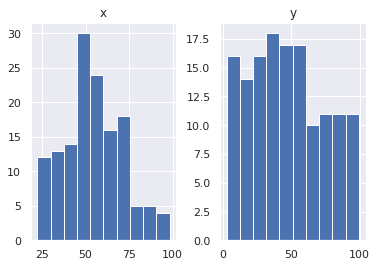

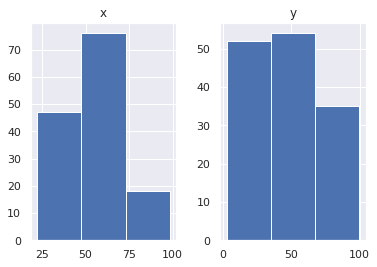

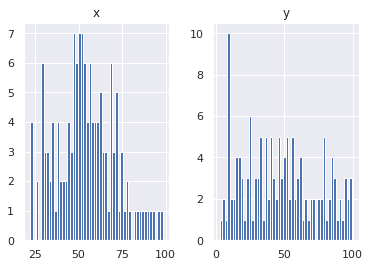

In [30]:
datasaurus.hist()
datasaurus.hist(bins=3)
datasaurus.hist(bins=50)

#### Box plot
Box plots are classical way of representing distributions. The upper and lower side of the 'box' are 25 and 75 quantiles. The line inside the box is 50 quantile (median). The 'whiskers' are typically the last data point inside 1.5 times the inter quantile range (IQR). The dots below and above 'whiskers' are often labeled as outliers, an unlikely observations given the distribution.

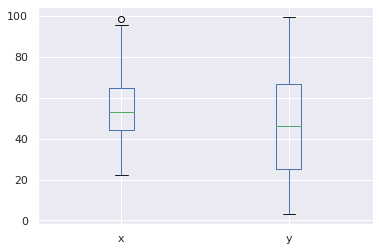

In [31]:
datasaurus.plot(kind="box")

## Robomission dataset
For basic description of structure see the [GitHub page](https://github.com/adaptive-learning/adaptive-learning-research/tree/master/data/robomission-2019-12).

In [32]:
attempts = pd.read_csv(
    "https://www.fi.muni.cz/~xcechak1/IB031/datasets/attempts.csv", parse_dates=[3]
)
attempts.head()

,id,student,problem,start,solved,time,n_edits,n_executions,program,problemset
0,4,29,2,2017-11-10 12:20:05.152265+00:00,True,24,3,2,lrf,2
1,5,29,12,2017-11-10 12:20:32.155447+00:00,True,19,4,1,rrff,5
2,6,29,10,2017-11-10 12:20:54.080259+00:00,True,10,3,1,sff,4
3,7,29,14,2017-11-10 12:21:06.966330+00:00,True,18,3,1,frl,3
4,8,29,11,2017-11-10 12:21:33.061485+00:00,True,27,4,1,R4{fs},7


Let's see how well the students are doing, i.e., what are their solving times, on the first problem in the system (problem id 51).

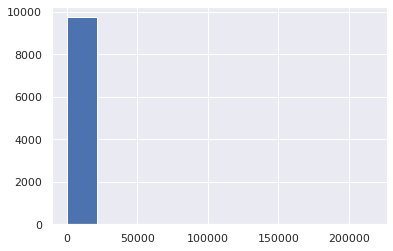

In [33]:
attempts[attempts.problem == 51].time.hist()

That is weird, right. Seems like it takes everybody the same amount of time to solve the problem. Well, not really.

<div class="alert alert-block alert-warning"><b>Exercise 1</b></div>

Select only a subset of rows selected in the previous example and draw more representative histogram of solving times similar to [this](https://www.fi.muni.cz/~xcechak1/IB031/tutorial02/img/problem51.png).

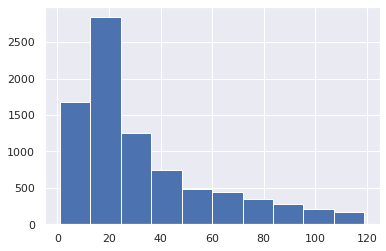

In [34]:
attempts[(attempts.problem == 51) & (attempts.time < 60 * 2)].time.hist()

From the histogram and from published papers it seems like the solving time follows log-normal distribution, i.e., logarithm of solving time is normally distributed.

<div class="alert alert-block alert-warning"><b>Exercise 2</b></div>

1. Create a new column with natural logarithm of values in column `time`.
2. Test the hypothesis that natural logarithm of solving time for **problem 6** of students that have actually **solved** the problem is normally distributed. Use function `normaltest` from `scipy` to do the test. Expected result of the test is p-value of 3.628811540066463e-151.
3. Based on the p-value of the test (and the example in `scipy` documentation for `normaltest` function) decide whether we can reject the hypothesis that the log times are distributed normally.

In [35]:
import numpy as np
from scipy.stats import normaltest

In [36]:
attempts["log_time"] = np.log(attempts["time"])
normaltest(attempts[(attempts.problem == 6) & (attempts.solved)].log_time)
# The p-value of the test quite small so we can reject the hypothesis.

/usr/local/lib64/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


NormaltestResult(statistic=692.8028876937235, pvalue=3.628811540066463e-151)

To have statistically reliable results from these tests or any kind of analysis we have to have enough data. Let's check we do have enough data collected for each of the problems in the dataset.

<div class="alert alert-block alert-warning"><b>Exercise 3</b></div>

Compute number of occurrences of each problem in the data and plot the distribution using bar plot. Make sure to order problems from most common to least common for better readability of the plot. The resulting plot should look like [this](https://www.fi.muni.cz/~xcechak1/IB031/tutorial02/img/problem_counts.png).

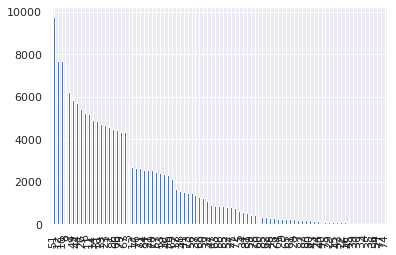

In [37]:
attempts.problem.value_counts().plot(kind="bar")

This plot is not really visually pleasing nor informative. There is no title (What does the plot show?), axes are missing labels (What kind of numbers are on y-axis?), and tick labels (What is the third number from the left on the bottom x-axis?).

All of these parameters can be changed using `matplotlib`'s `axis` object. All of the plots were actually drawn by `matplotlib` but pandas luckily provides high-level API, so you don't have to draw individual lines. Let's pimp the plot.

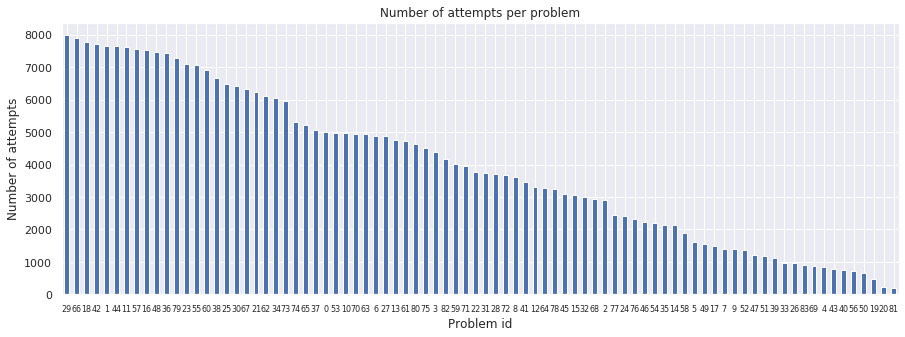

In [38]:
ax = (
    pd.Series(np.random.randint(0, 8000, 84))
    .sort_values(ascending=False)
    .plot(kind="bar", figsize=(15, 5))
)  # random data similar to previous exercise
ax.set_title("Number of attempts per problem")  # plot title
ax.set_ylabel("Number of attempts")  # y-axis (vertical) label
ax.set_xlabel("Problem id")  # x-axis (horizontal) label
ax.tick_params(
    axis="x", rotation=0, labelsize=8
)  # make number smaller and stand upright

<div class="alert alert-block alert-warning"><b>Exercise 4</b></div>

Use the axis modification example above to improve plot from Exercise 3.

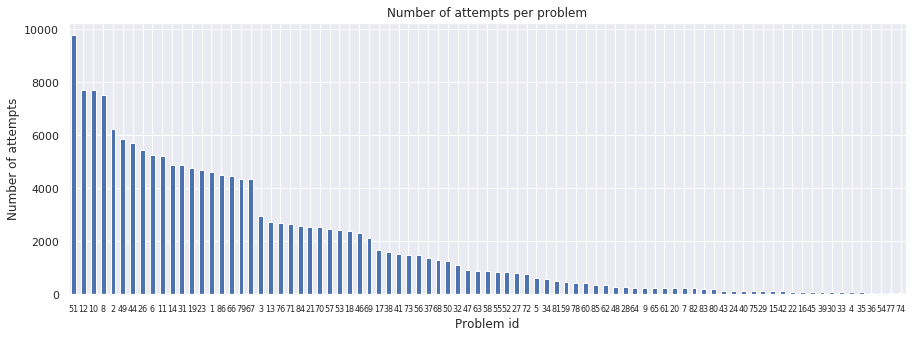

In [39]:
ax = attempts.problem.value_counts().plot(kind="bar", figsize=(15, 5))
ax.set_title("Number of attempts per problem")
ax.set_ylabel("Number of attempts")
ax.set_xlabel("Problem id")
ax.tick_params(axis="x", rotation=0, labelsize=8)

Much better! Now this plot might be somewhat useful. You can also save the plot for later. You need to import `pyplot` and call `savefig` function. It will save everything that has been plotted in the cells so far.

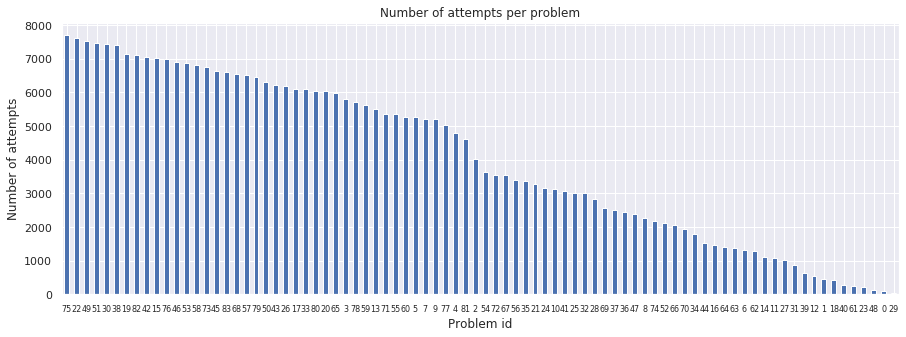

In [40]:
import matplotlib.pyplot as plt

# just plot it again
ax = (
    pd.Series(np.random.randint(0, 8000, 84))
    .sort_values(ascending=False)
    .plot(kind="bar", figsize=(15, 5))
)  # random data similar to previous exercise
ax.set_title("Number of attempts per problem")  # plot title
ax.set_ylabel("Number of attempts")  # y-axis (vertical) label
ax.set_xlabel("Problem id")  # x-axis (horizontal) label
ax.tick_params(
    axis="x", rotation=0, labelsize=8
)  # make number smaller and stand upright

# the file format is automatically recognised from file extension
plt.savefig(
    "my_plot.png",  # file name of the save image
    dpi=300,  # resolution of produced image
    bbox_inches="tight",  # make borders tigther to plot
)

Matplotlib is a huge library and while it can do a lot of things, it's far from intuitive and easy. Luckily, there are higher-level plotting libraries like `seaborn` or `plotly`. We will focus on `seaborn`.

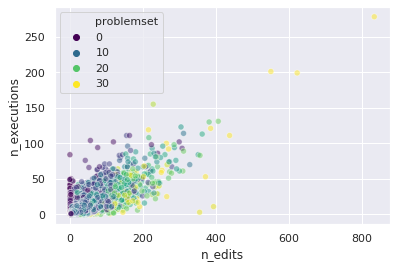

In [41]:
import seaborn as sns  # import seaborn

sns.set()  # make plots magically prettier :)

sns.scatterplot(
    data=attempts,  # dataframe to take values from
    x="n_edits",  # column name to use as x-axis
    y="n_executions",  # column name to use as y-axis
    hue="problemset",  # column name whos value will decide point color
    palette="viridis",  # collor palet to use
    alpha=0.5,  # make point a bit translucent to better see the density of points
)

Apart from making plots nicer, it also comes with handy plotting functions both for plots introduced earlier and also other plots not supported by `Pandas`'s `plot` method. 

First function is `pairplot` that lets you plot all columns from a data frame against each other using scatter plots and plot each column histogram - all in one grid.

In [42]:
weather = pd.read_csv("https://www.fi.muni.cz/~xcechak1/IB031/datasets/weather.csv")

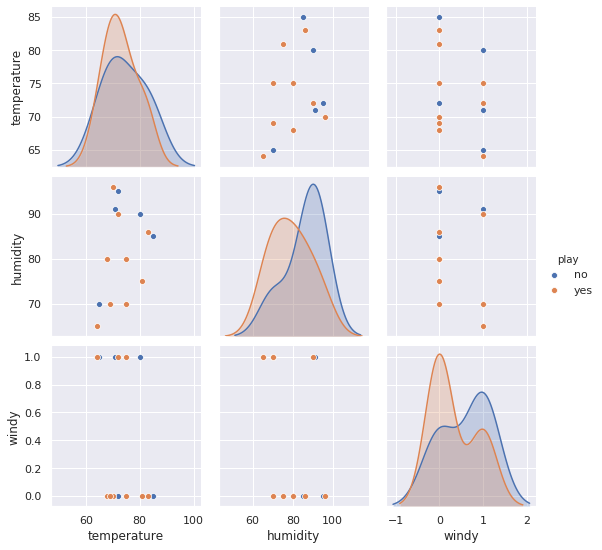

In [43]:
sns.pairplot(weather, vars=["temperature", "humidity", "windy"], hue="play")

<div class="alert alert-block alert-warning"><b>Exercise 5</b></div>

Use `pairplot` to plot columns **time**, **n_edits**, and **n_executions** from attempts dataset and change hue based on whether students **solved** the **problem 17**. The result should look like [this](https://www.fi.muni.cz/~xcechak1/IB031/tutorial02/img/attempts_pairplot.png).

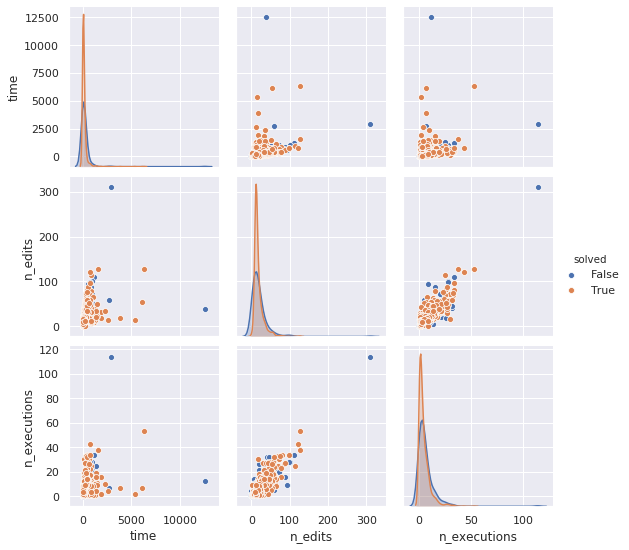

In [44]:
sns.pairplot(
    attempts[attempts.problem == 17],  # plot data about problem 17
    vars=["time", "n_edits", "n_executions"],  # what columns to plot against each other
    hue="solved",  # change color based on student ability to solve problem
)

Let's look at heatmaps, another plot not available in `Pandas`.

#### Heatmap
Heatmaps are used to visualize function values either in plane or on a discrete grid. The color is based on the function value. Humans can easily see "hot spots" in the data where the function value is different.

As an example, let's plot number of transported passengers through months and years. The plot illustrates the peak in summer months.

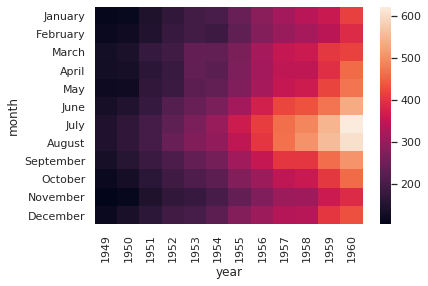

In [45]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

When collecting data, we are often interested in patterns in time. There are two typical goals of exploratory data analysis for time-series data. 
1. We are interested in seeing patterns in progression of some variable in time that will help us in forecasting future values (e.g., stock markets, weather, and machine failures).
2. We are interested in differences in data collected at different points in time and whether they share the same characteristics (e.g., Is the traffic data similar in the morning and in the evening?).

<div class="alert alert-block alert-danger"><b>Exercise 6</b></div>

Let's explore the stock markets! We want to visualize stock prices throughout year 2017 and find out if we could see any trends. Then, we want to compare how Google stock prices evolved in each month. Finally, we want to explore if there are any patterns in stock price daily changes on different days of the week.

1. Load dataset with [sample of real stocks data](https://www.fi.muni.cz/~xcechak1/IB031/datasets/stocks_sample.csv).
2. Make sure that column date has been converted to type `datetime` and is not interpreted as string!
3. Create three new columns called `weekday`, `month`, and `day` with number of week day, number of month, and day number respectively. See `Pandas` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetimelike-properties) on how to extract these informations from date column.
4. Use `seaborns`'s `lineplot` to plot stock prices throughout 2017 at market closing. The plot should look like [this](https://www.fi.muni.cz/~xcechak1/IB031/tutorial02/img/stocks_year.png).
5. Use the same function to plot Google's stocks (stocks with name 'GOOGL') progression in each of the months. The plot should look like [this](https://www.fi.muni.cz/~xcechak1/IB031/tutorial02/img/google_stocks.png).
6. Create new column with differences in opening and closing stock prices.
7. Visualize the differences for each weekday using `Seaborn`'s `boxplot` function. The plot should look like [this](https://www.fi.muni.cz/~xcechak1/IB031/tutorial02/img/stocks_weekday.png).

In [46]:
# 1
stocks = pd.read_csv("../datasets/stocks_sample.csv", parse_dates=[0])
# 3
stocks["weekday"] = stocks.date.dt.weekday
stocks["month"] = stocks.date.dt.month
stocks["day"] = stocks.date.dt.day
# 4
sns.lineplot(data=stocks, x="date", y="close", hue="name")
plt.show()
# 5
sns.lineplot(data=stocks[stocks.name == "GOOGL"], x="day", y="close", hue="month")
plt.show()
# 6
stocks["difference"] = stocks["close"] - stocks["open"]
plt.show()
# 7
sns.boxplot(data=stocks, x="weekday", y="difference", hue="name")

FileNotFoundError: [Errno 2] File ../datasets/stocks_sample.csv does not exist: '../datasets/stocks_sample.csv'